NMF simulation on toy data
simulations finished
NMF simulation on row shuffled toy data
NMF simulation on column shuffled toy data
Perform NMF on column and row shuffled data
Plotting the clustering results Toy DataSet


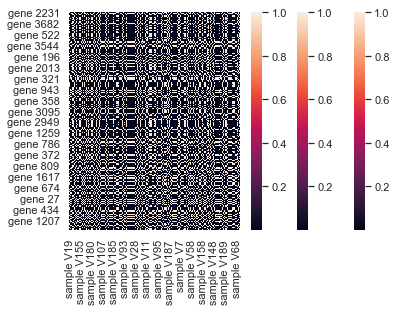

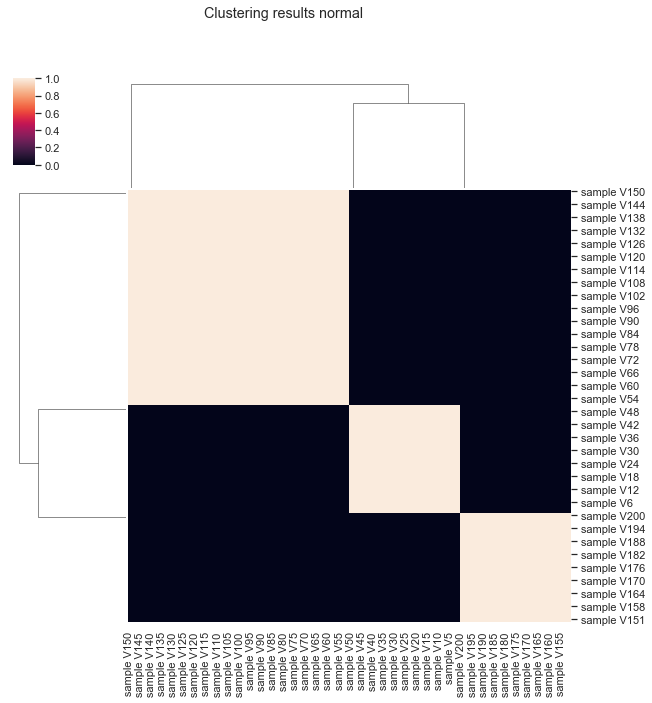

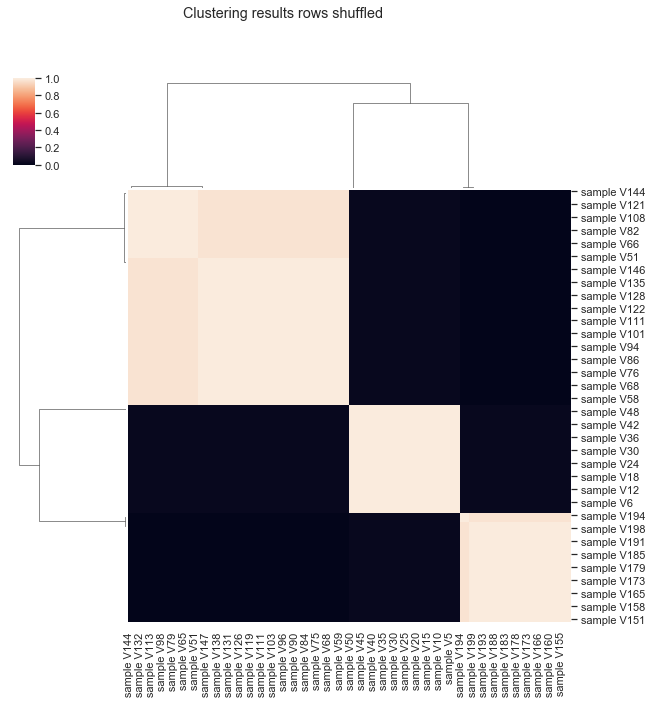

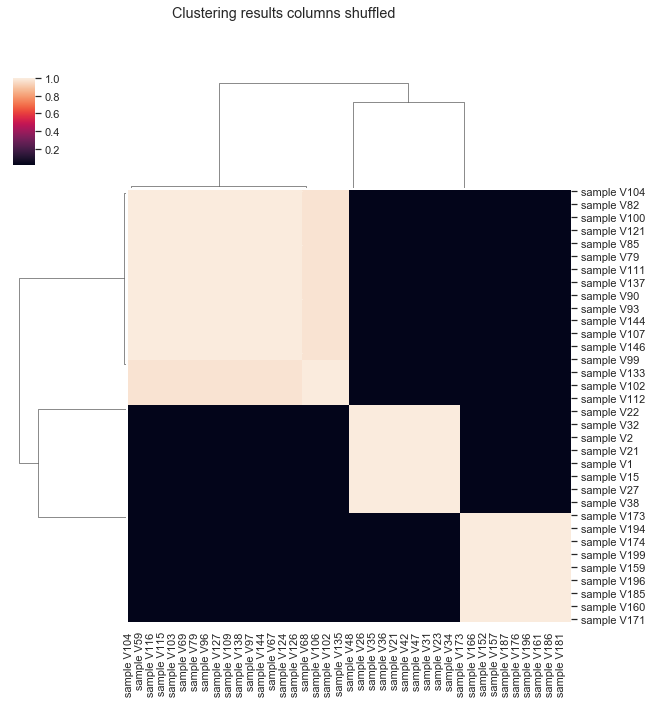

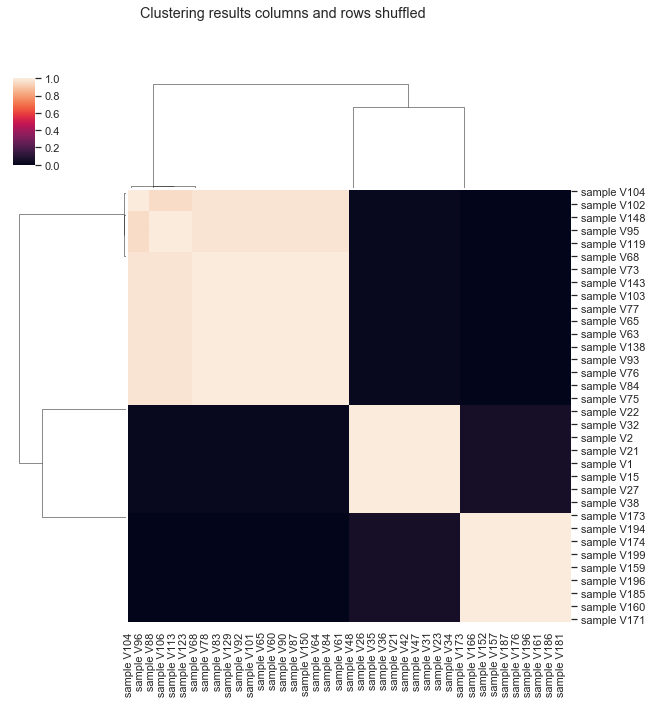

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from IPython.display import display,HTML
from scipy.spatial.distance import euclidean,pdist,squareform 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance 
from sklearn.utils import validation
from sklearn.metrics import pairwise
from scipy.sparse import issparse
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

sns.set(style ="whitegrid") 

"Load the functions that are used in the workflow"
def readData(fileName):
    datafile=pd.read_csv(fileName,sep='\t',index_col=0)
    return datafile

def consensusMatrix(Hdata,samplenames):
    CoAssociationMatrices=[]
    for x in range(len(Hdata)):
        MembersOfClusters,occurenceCluster=determineClusterMembers(Hdata[x],samplenames)
        CoAssociationMatrix=coAssociationMatrix(occurenceCluster)
        CoAssociationMatrices.append(CoAssociationMatrix)
        Consensusmatrix=sum(CoAssociationMatrices)
        Consensusmatrix=Consensusmatrix/len(Hdata)
    
    return Consensusmatrix

def coAssociationMatrix(clusterlist):
    "For each list of samples in cluster create a association matrix"
    results=[[int(x==y) for y in clusterlist]for x in clusterlist]
    coAssociation=np.array(results)
    
    return coAssociation

def determineClusterMembers(Hmatrix,samplenames):
    "For each column in H, maximum value will be determined and right cluster assigned"
    index_maxvalue=np.argmax(Hmatrix,axis=0)
    ClusterMembers=[]
    for cluster in range(np.min(index_maxvalue),np.max(index_maxvalue)+1):
        ClusterMembers.append([i for indx, i in enumerate(samplenames) if index_maxvalue[indx]==cluster])
        
    return ClusterMembers,index_maxvalue

def multiNMF_updateW(V,W,H,WH,V_over_WH,OmicsPlatform):
    W = [W[i]* np.dot(V_over_WH[i], H.T) / H.sum(axis=1) for i in range(OmicsPlatform)]
    WH=[W[i].dot(H) for i in range(OmicsPlatform)]
    V_over_WH=[V[i]/WH[i] for i in range(OmicsPlatform)]
    return W,WH, V_over_WH 

def multiNMF_updateH(V,W,H,WH,V_over_WH,OmicsPlatform):
    #WtX=[np.dot(W[i].T,X[i]) for i in range(len(X))]
    #WtWH=[np.dot(np.dot(W[i].T,W[i]),H) for i in range(len(X))]
    H_upd1=(np.dot(V_over_WH[0].T,W[0]) / W[0].sum(axis=0)).T
    H_upd2=(np.dot(V_over_WH[1].T,W[1]) / W[1].sum(axis=0)).T
    com_upd=H_upd1+H_upd1
    H *= com_upd
    WH=[W[i].dot(H) for i in range(OmicsPlatform)]
    V_over_WH=[V[i]/WH[i] for i in range(OmicsPlatform)]
    return H,WH,V_over_WH 



def multiNMF_factor(V1,V2,r,OmicsPlatform,iterations=100):
    n1,m2=V1.shape
    n2,m2=V2.shape
    avg_V1=V1.mean()
    avg_V2=V2.mean()
    W1=np.random.rand(n1,r)
    W2=np.random.rand(n2,r)
    H=np.random.rand(r,m2)
    W=[W1,W2]
    V=[V1,V2]
    WH=[W[i].dot(H) for i in range(OmicsPlatform)]
    V_over_WH=[V[i]/WH[i] for i in range(OmicsPlatform)]
    for i in range(iterations):
        W,WH,V_over_WH=multiNMF_updateW(V,W,H,WH,V_over_WH,OmicsPlatform)
        H,WH,V_over_WH=multiNMF_updateH(V,W,H,WH,V_over_WH,OmicsPlatform)
        divergence = [((V[i] * np.log(V_over_WH[i])) - V[i] + WH[i]).sum() for i in range(OmicsPlatform)]
    return W,H,divergence

if __name__=="__main__":
    "read toy data"
    X1toy=readData(fileName='C:/Users/tim.kuijpers/Documents/X1toySet.txt')
    X2toy=readData(fileName='C:/Users/tim.kuijpers/Documents/X2toydata.txt')

    performNMF_normal=True
    performNMF_rowshuffle=True
    performNMF_colshuffle=True
    performNMF_rowcolshuffle=True
    if(performNMF_normal==True):
        print('NMF simulation on toy data')
        "Perfrom multi NMF on x1toy and x2toy"
        W_ResultsRandom_MultipleRuns=[]
        H_ResultsRandom_MultipleRuns=[]
        FX_multipleruns=[]
        simcount=0
        for x in range(50):
            Hrandom=np.random.rand(3,200)
            W,H,Fvalues_X1=multiNMF_factor(X1toy,X2toy,3,2,iterations=100)
            W_ResultsRandom_MultipleRuns.append(W)
            H_ResultsRandom_MultipleRuns.append(H)
            FX_multipleruns.append(Fvalues_X1)
            if x==10:
                print('simulations finished')

    if(performNMF_rowshuffle==True):
        print('NMF simulation on row shuffled toy data')
        "Perform multi NMF on row shuffled x1toy and x2toy"
        X1_rowshuffle=shuffle(X1toy,random_state=0)
        X2_rowshuffle=shuffle(X2toy,random_state=0)
        sns.heatmap(X1_rowshuffle)

        W_rowshuffle_ResultsRandom_MultipleRuns=[]
        H_rowshuffle_ResultsRandom_MultipleRuns=[]
        FX_rowshuffle_multipleruns=[]
        simcount=0
        for x in range(50):
            Hrandom=np.random.rand(3,200)
            W,H,Fvalues_X1=multiNMF_factor(X1_rowshuffle, X2_rowshuffle,3,2,iterations=100)
            W_rowshuffle_ResultsRandom_MultipleRuns.append(W)
            H_rowshuffle_ResultsRandom_MultipleRuns.append(H)
            FX_rowshuffle_multipleruns.append(Fvalues_X1)
            if x==50:
                print('simulations finished')
                
    if(performNMF_colshuffle==True):
        print('NMF simulation on column shuffled toy data')
        X1=X1toy
        X2=X2toy
        X1t=np.transpose(X1)
        X2t=np.transpose(X2)
        X1t=shuffle(X1t,random_state=0)
        X2t=shuffle(X2t,random_state=0)
        X1_colshuffle=np.transpose(X1t)
        X2_colshuffle=np.transpose(X2t)
        sns.heatmap(X1_colshuffle)

        W_colshuffle_ResultsRandom_MultipleRuns=[]
        H_colshuffle_ResultsRandom_MultipleRuns=[]
        FX_colshuffle_multipleruns=[]
        simcount=0
        for x in range(50):
            Hrandom=np.random.rand(3,200)
            W,H,Fvalues_X1=multiNMF_factor(X1_colshuffle,X2_colshuffle,3,2,iterations=100)
            W_colshuffle_ResultsRandom_MultipleRuns.append(W)
            H_colshuffle_ResultsRandom_MultipleRuns.append(H)
            FX_colshuffle_multipleruns.append(Fvalues_X1)
            if x==50:
                print('simulations finished')

    if(performNMF_rowcolshuffle==True):
        print('Perform NMF on column and row shuffled data')
        "Perform multi NMF on row and col shuffled x1toy and x2toy"
        X1=X1toy
        X2=X2toy
        X1=shuffle(X1,random_state=0)
        X2=shuffle(X2,random_state=0)
        X1t=np.transpose(X1)
        X2t=np.transpose(X2)
        X1t=shuffle(X1t,random_state=0)
        X2t=shuffle(X2t,random_state=0)
        X1_colrowshuffle=np.transpose(X1t)
        X2_colrowshuffle=np.transpose(X2t)
        sns.heatmap(X1_colrowshuffle)

        W_colrowshuffle_ResultsRandom_MultipleRuns=[]
        H_colrowshuffle_ResultsRandom_MultipleRuns=[]
        FX_colrowshuffle_multipleruns=[]
        simcount=0
        for x in range(50):
            Hrandom=np.random.rand(3,200)
            W,H,Fvalues_X1=multiNMF_factor(X1_colrowshuffle,X2_colrowshuffle,3,2,iterations=100)
            W_colrowshuffle_ResultsRandom_MultipleRuns.append(W)
            H_colrowshuffle_ResultsRandom_MultipleRuns.append(H)
            FX_colrowshuffle_multipleruns.append(Fvalues_X1)
            if x==50:
                print('simulations finished')

    print('Plotting the clustering results Toy DataSet')
    if(performNMF_normal==True):
        samples=range(1,200)
        Hconsmatrix=consensusMatrix(H_ResultsRandom_MultipleRuns,samples)
        "Create dataframe and set row and col names to the matching X1,X2 order"
        Hconsmatrix_H=pd.DataFrame(Hconsmatrix,index=X1toy.columns.values,columns=X1toy.columns.values)
        NMF_plot=sns.clustermap(Hconsmatrix_H).fig.suptitle('Clustering results normal')   
        fig1=NMF_plot.get_figure()
        fig1.savefig('NMF_NoiseFree_Normal.png')
    if(performNMF_rowshuffle==True):
        samples=range(1,200)
        rowshuffledconsmatrix=consensusMatrix( H_rowshuffle_ResultsRandom_MultipleRuns,samples)
        "Create dataframe and set row and col names to the matching X1,X2 order"
        rowshuffled_H=pd.DataFrame(rowshuffledconsmatrix,index=X1_rowshuffle.columns.values,columns=X1_rowshuffle.columns.values)
        NMF_plot2=sns.clustermap(rowshuffled_H).fig.suptitle('Clustering results rows shuffled')   
        fig2=NMF_plot2.get_figure()
        fig2.savefig('NMF_NoiseFree_RowShuffle.png')
    if(performNMF_colshuffle==True):
        samples=range(1,200)
        colshuffledconsmatrix=consensusMatrix(H_colshuffle_ResultsRandom_MultipleRuns,samples)
        "Create dataframe and set row and col names to the matching X1,X2 order"
        colshuffled_H=pd.DataFrame(colshuffledconsmatrix,index=X1_colshuffle.columns.values,columns=X1_colshuffle.columns.values)
        NMF_plot3=sns.clustermap(colshuffled_H).fig.suptitle('Clustering results columns shuffled')
        fig3=NMF_plot3.get_figure()
        fig3.savefig('NMF_NoiseFree_ColShuffle.png')
    if(performNMF_rowcolshuffle==True):
        samples=range(1,200)
        rowcolshuffledconsmatrix=consensusMatrix( H_colrowshuffle_ResultsRandom_MultipleRuns,samples)
        "Create dataframe and set row and col names to the matching X1,X2 order"
        colrowshuffled_H=pd.DataFrame(rowcolshuffledconsmatrix,index=X1_colrowshuffle.columns.values,columns=X1_colrowshuffle.columns.values)
        NMF_plot4=sns.clustermap(colrowshuffled_H).fig.suptitle('Clustering results columns and rows shuffled')    
        fig4=NMF_plot4.get_figure()
        fig4.savefig('NMF_NoiseFree_RowColShuffled.png')
  
        